In [1]:
import pandas as pd
import numpy as np
import re

Read data

In [2]:
pdDD=pd.read_csv('/home/magi/UAMdeconflictionMasterThesis/modelli/results/30_heurMercedes.csv')
pdAP=pd.read_csv('/home/magi/UAMdeconflictionMasterThesis/modelli/results/30_heurMercedes_AP.csv')
pdNC=pd.read_csv('/home/magi/UAMdeconflictionMasterThesis/modelli/results/30_heurMercedes_NC.csv')
pdNC

,instance,timeLim,opt,totalTime,bestTime,nIter,optIter
0,airport25,30,3.433584,1.398680,0.628829,5,3
1,airport28,30,3.515413,1.756058,0.702470,4,2
2,airport20,30,5.050125,2.132890,0.889383,4,2
3,airport2,30,1.157895,2.076207,0.188564,4,1
4,airport18,30,1.157895,2.376241,0.219657,4,1
...,...,...,...,...,...,...,...
252,metroplex55,30,9.569832,700.949908,498.769088,21,15
253,metroplex71,30,10.957393,664.469682,369.467171,21,12
254,metroplex80,30,35.494824,673.529716,413.453178,21,13
255,metroplex89,30,306.160303,691.291225,622.301956,21,19


Generate latex with name, the information in the csv

In [ ]:
#NC
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/times/TimesNC.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdDD.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|"))
    f.write("\\end{document}")

#AP
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/times/TimesAP.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdAP.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|"))
    f.write("\\end{document}")

#Drift and delay

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/times/TimesDD.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdNC.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|"))
    f.write("\\end{document}")

### Creazioni di sotto dataframe per tipologia e per tini

#### drift and delay dataframe

In [3]:
#drift and delay merged
#airport
df_air01=pdDD[pdDD["instance"].str.contains(r"airport\d+nDr0nDe1")]
df_air02=pdDD[pdDD["instance"].str.contains(r"airport\d+nDr0nDe2")]
df_air03=pdDD[pdDD["instance"].str.contains(r"airport\d+nDr0nDe3")]
#grid
df_grid01=pdDD[pdDD["instance"].str.contains(r"grid\d+nDr0nDe1")]
df_grid02=pdDD[pdDD["instance"].str.contains(r"grid\d+nDr0nDe2")]
df_grid03=pdDD[pdDD["instance"].str.contains(r"grid\d+nDr0nDe3")]
#metroplex
df_mp01=pdDD[pdDD["instance"].str.contains(r"metroplex\d+nDr0nDe1")]
df_mp02=pdDD[pdDD["instance"].str.contains(r"metroplex\d+nDr0nDe2")]
df_mp03=pdDD[pdDD["instance"].str.contains(r"metroplex\d+nDr0nDe3")]

#### AP dataframe

In [4]:
#airport
df_airAP = pdAP[(pdAP["instance"].str.contains(r"airport")) ]
#grid
df_gridAP = pdAP[(pdAP["instance"].str.contains(r"grid"))]
#metroplex
df_mpAP = pdAP[(pdAP["instance"].str.contains(r"metroplex"))]


#### non collaborative dataframe

In [5]:
#airport
df_airNC = pdNC[(pdNC["instance"].str.contains(r"airport")) ]
#grid
df_gridNC = pdNC[(pdNC["instance"].str.contains(r"grid"))]
#metroplex
df_mpNC = pdNC[(pdNC["instance"].str.contains(r"metroplex"))]

media,valore attesso e tutto il resto per result e i vari time

In [6]:
def get_formatted_name(data_name,AP=False,NC=False):
    data_name = data_name.replace("Fixed", "")
    match = re.match(r"([a-zA-Z]+)(\d+)([a-zA-Z0-9-]*)", data_name)
    if match:
        part1 = match.group(1)
        part2 = match.group(3)
        part3 = ""
        if AP:
            part3 = "AP"
        elif NC:
            part3 = "NC"        
        return f"{part1}{part2}{part3}"
    else:
        return data_name  # Caso in cui non ci sia un numero nel nome

In [7]:
get_formatted_name("airport87Fixed",NC=True)

'airportNC'

In [8]:
dfs     = [df_air01,df_air02,df_air03,df_grid01,df_grid02,df_grid03,df_mp01,df_mp02,df_mp03]
dfsAP   = [df_airAP,df_gridAP,df_mpAP]
dfsNC   = [df_airNC,df_gridNC,df_mpNC]
def obtainStatsSummary(filtered_merged, columnName, AP=False, NC=False):

    stats = {
        "Typology":         get_formatted_name(filtered_merged["instance"].iloc[0],AP,NC),
        "Mean":             filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].mean(),
        "STD":              filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].std(),
        "Min":              filtered_merged[columnName].min(),
        "Max":              filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].max(),
        "CountSolved":      filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].count(),      
        "TotalCount":       filtered_merged[columnName].count()
    }
    return stats

### Write the file 

##### Comparison Table, with fixed and non fixed values

##### Summary tables, free and fixed results divided

In [11]:
dfs     = [df_air01,df_air02,df_air03,df_grid01,df_grid02,df_grid03,df_mp01,df_mp02,df_mp03]
dfsAP   = [df_airAP,df_gridAP,df_mpAP]
dfsNC   = [df_airNC,df_gridNC,df_mpNC]

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/times/SummaryTables.tex", "w") as f:
    f.write("\\begin{document}\n")

    #prima tabella: opt
    
    results = []
    for i, df in enumerate(dfs):
        #def obtainStatsSummary(filtered_merged, columnName, AP=False, NC=False):
        stats = obtainStatsSummary(df, "opt")
        results.append(stats)
    for i, df in enumerate(dfsAP):
        stats = obtainStatsSummary(df, "opt",AP=True)
        results.append(stats)
    for i, df in enumerate(dfsNC):
        stats = obtainStatsSummary(df, "opt",NC=True)
        results.append(stats)
    
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:heuristic:results",caption="Statistics about \\textbf{objective function value} obtained from heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #seconda tabella: totalTime

    results = []
    for i, df in enumerate(dfs):
        stats = obtainStatsSummary(df, "totalTime")
        results.append(stats)    
    for i, df in enumerate(dfsAP):
        stats = obtainStatsSummary(df, "totalTime",AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNC):
        stats = obtainStatsSummary(df, "totalTime",NC=True)
        results.append(stats)
    
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:heuristic:totalTime",caption="Statistic about \\textbf{total Time} needed for heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #terza tabella: bestTime
    results = []
    for i, df in enumerate(dfs):
        stats = obtainStatsSummary(df, "bestTime")
        results.append(stats)    
    for i, df in enumerate(dfsAP):
        stats = obtainStatsSummary(df, "bestTime",AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNC):
        stats = obtainStatsSummary(df, "bestTime",NC=True)
        results.append(stats)
    
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:heuristic:bestTime",caption="Statistic about \\textbf{time when found optimal solution} needed for heurstic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #quarta tabella: nIter
    results = []    
    for i, df in enumerate(dfs):
        stats = obtainStatsSummary(df, "nIter")
        results.append(stats)    
    for i, df in enumerate(dfsAP):
        stats = obtainStatsSummary(df, "nIter",AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNC):
        stats = obtainStatsSummary(df, "nIter",NC=True)
        results.append(stats)
    
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:heuristic:nIter",caption="Statistic about \\textbf{total number of iterations} needed for heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #quinta tabella: optIter
    results = []    
    for i, df in enumerate(dfs):
        stats = obtainStatsSummary(df, "optIter")
        results.append(stats)    
    for i, df in enumerate(dfsAP):
        stats = obtainStatsSummary(df, "optIter",AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNC):
        stats = obtainStatsSummary(df, "optIter",NC=True)
        results.append(stats)
    
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:heuristic:optIter",caption="Statistic about \\textbf{iteration when it's found the best solution} needed for heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)
    f.write("\\end{document}")

comparazione con modello completo

In [14]:
pdFree = pd.read_csv('/home/magi/UAMdeconflictionMasterThesis/modelli/results/allFree.csv')
# Add suffix to 'instance' column for pdAP and pdNC
pdAP['instance'] = pdAP['instance'] + 'AP'
pdNC['instance'] = pdNC['instance'] + 'NC'

dfAll = pd.concat([pdDD, pdAP, pdNC])
pdFree['instance'] = pdFree['instance'].apply(lambda x: re.sub(r'AP/(.*)', r'\1AP', x))
pdFree['instance'] = pdFree['instance'].apply(lambda x: re.sub(r'NC/(.*)', r'\1NC', x))

dfCompare = pd.merge(dfAll,pdFree, on="instance", how="inner", suffixes=('_heur', '_free'))
dfCompare["diff"] = dfCompare["opt"] - dfCompare["result"]

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/times/comparison.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(dfCompare[["instance","opt","result","diff","totalTime_heur","totalTime_free"]].to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:heuristic:compare",caption="Comparison between \\textbf{heuristic} and \\textbf{model without fixed path} "))
    f.write("\\end{document}")

dfCompare[["instance","opt","result","diff","totalTime_heur","totalTime_free"]]

,instance,opt,result,diff,totalTime_heur,totalTime_free
0,metroplex14nDr0nDe2,5.694236,5.393484,0.300752,0.379412,607.444620
1,metroplex19nDr0nDe2,4.157895,3.789474,0.368421,0.319781,362.203062
2,metroplex23nDr0nDe2,11.130326,11.130326,0.000000,0.341418,339.928517
3,grid14nDr0nDe2,2.842105,2.842105,0.000000,0.411706,59.706271
4,airport19nDr0nDe3,1.646617,1.646617,0.000000,0.385910,7.178048
5,airport18nDr0nDe1,1.548872,1.548872,0.000000,0.417111,7.162805
6,airport30nDr0nDe1,0.822055,0.822055,0.000000,0.403829,5.305924
7,airport30nDr0nDe2,1.393484,1.393484,0.000000,0.401886,4.893230
8,metroplex32nDr0nDe1,5.576441,5.576441,0.000000,0.428958,136.046468
9,airport2nDr0nDe3,1.107769,1.107769,0.000000,0.375512,4.879672


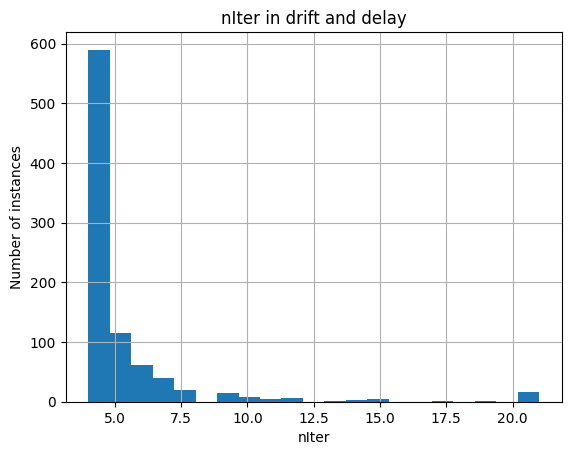

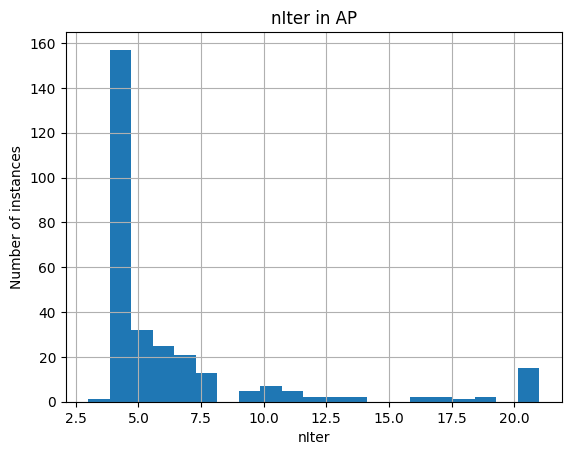

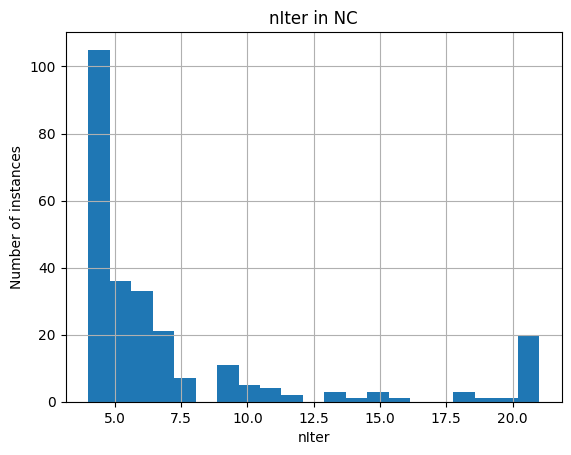

In [47]:
ax = pdDD.hist(column="nIter", bins=21)
ax[0][0].set_xlabel('nIter')
ax[0][0].set_ylabel('Number of instances')
ax[0][0].set_title('nIter in drift and delay')

# Generate histograms for pdAP and pdNC
ax_ap = pdAP.hist(column="nIter", bins=21)
ax_ap[0][0].set_xlabel('nIter')
ax_ap[0][0].set_ylabel('Number of instances')
ax_ap[0][0].set_title('nIter in AP')

ax_nc = pdNC.hist(column="nIter", bins=21)
ax_nc[0][0].set_xlabel('nIter')
ax_nc[0][0].set_ylabel('Number of instances')
ax_nc[0][0].set_title('nIter in NC')
# Save the figure
fig_dd = ax[0][0].get_figure()
fig_dd.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/nIter_histogram_DD.png')

fig_ap = ax_ap[0][0].get_figure()
fig_ap.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/nIter_histogram_AP.png')

fig_nc = ax_nc[0][0].get_figure()
fig_nc.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/nIter_histogram_NC.png')

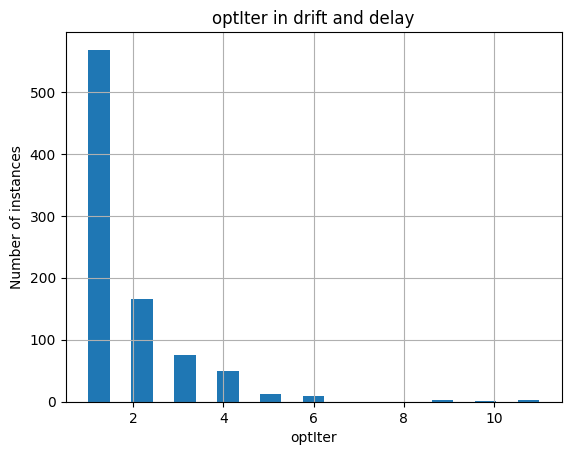

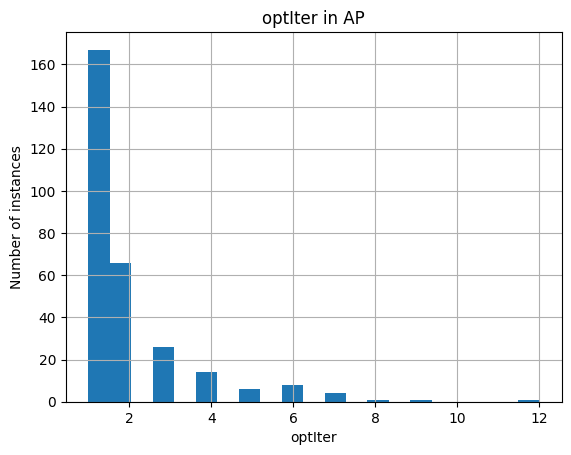

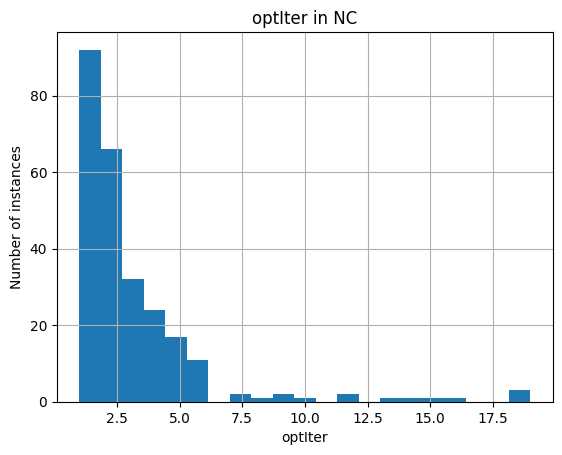

In [48]:
ax = pdDD.hist(column="optIter", bins=21)
ax[0][0].set_xlabel('optIter')
ax[0][0].set_ylabel('Number of instances')
ax[0][0].set_title('optIter in drift and delay')

# Generate histograms for pdAP and pdNC
ax_ap = pdAP.hist(column="optIter", bins=21)
ax_ap[0][0].set_xlabel('optIter')
ax_ap[0][0].set_ylabel('Number of instances')
ax_ap[0][0].set_title('optIter in AP')

ax_nc = pdNC.hist(column="optIter", bins=21)
ax_nc[0][0].set_xlabel('optIter')
ax_nc[0][0].set_ylabel('Number of instances')
ax_nc[0][0].set_title('optIter in NC')
# Save the figure
fig_dd = ax[0][0].get_figure()
fig_dd.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/optIter_histogram_DD.png')

fig_ap = ax_ap[0][0].get_figure()
fig_ap.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/optIter_histogram_AP.png')

fig_nc = ax_nc[0][0].get_figure()
fig_nc.savefig('/home/magi/UAMdeconflictionMasterThesis/risultati/heuristic/pic/optIter_histogram_NC.png')